In [16]:
import harpy
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spatialdata as sd
import seaborn as sns

np.random.seed(0)

In [17]:
sns.set_context('paper', rc={'figure.dpi': 600})
sns.set_style("ticks")

In [18]:
sdata_all = harpy.datasets.pixie_example()
sdata_all

2025-06-16 12:46:48,663 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov0'


/home/benjaminr/.cache/huggingface/datasets/downloads/extracted/827647019971bbacf828bced2812f05317b33b7bf1b61e04ff3456d4ab112404/post_clustering


2025-06-16 12:46:48,679 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov0'
2025-06-16 12:46:48,694 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov0'
2025-06-16 12:46:49,059 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov1'
2025-06-16 12:46:49,076 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov1'
2025-06-16 12:46:49,093 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov1'
2025-06-16 12:46:50,008 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov2'
2025-06-16 12:46:50,025 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov2'
2025-06-16 12:46:50,042 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov2'
2025-06-16 12:46:50,395 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov3'
2025-06-16 12:46:50,412 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov3

SpatialData object
├── Images
│     ├── 'raw_image_fov0': DataArray[cyx] (22, 512, 512)
│     ├── 'raw_image_fov1': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov2': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov3': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov4': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov5': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov6': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov7': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov9': DataArray[cyx] (22, 1024, 1024)
│     └── 'raw_image_fov10': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov0': DataArray[yx] (512, 512)
│     ├── 'label_nuclear_fov1': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov2': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov3': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov4': DataArray[yx] (1024, 1024)
│     ├

In [19]:
marker_list = [
    'CD14', 'CD163', 'CD20', 'CD3', 
    # 'CD31', 
    'CD4', 'CD45', 'CD68', 'CD8', 'HLADR'
]

In [20]:
cell_type_selection = [
    # 'APC',
    'Bcell',
    'CD14_monocyte',
    'CD4T',
    'CD8T',
    'M1_macrophage',
    'M2_macrophage',
]

palette = [
    '#FF0000',  # Bcell
    '#00FF00',  # CD14_monocyte
    '#0000FF',  # CD4T
    "#FF8C00",  # CD8T
    '#FF00FF',  # M1_macrophage
    '#00FFFF',  # M2_macrophage
]

In [21]:
# for all coordinate systems, filter and check length of table
# for cs in sdata_all.coordinate_systems:
#     sdata = deepcopy(sd.SpatialData.filter_by_coordinate_system(sdata_all, cs))
#     print(f"Coordinate system: {cs}")
#     adata = sdata['table']
#     print(f"Number of total cells: {len(adata)}")
#     sdata['table'] = adata[adata.obs['cell_meta_cluster'].isin(cell_type_selection), marker_list]
#     adata = sdata['table']
#     print(f"Number of selected cells: {len(adata)}")
#     sdata.pl.render_labels('label_whole_' + cs, color='cell_meta_cluster').pl.show()
#     sc.pp.neighbors(adata, n_neighbors=10)
#     sc.tl.umap(adata, min_dist=0.1, spread=1.0)
#     sc.pl.umap(adata, color=['cell_meta_cluster'], frameon=False, show=True)

In [22]:
import seaborn as sns

sns.set_context('paper', rc={'figure.dpi': 600})
sns.set_style("ticks")

In [23]:
cs = 'fov8'
sdata = sd.SpatialData.filter_by_coordinate_system(sdata_all, cs)
adata = sdata['table']
mask = adata.obs['cell_meta_cluster'].isin(cell_type_selection)
adata_subset = adata[mask, marker_list].copy()
sdata['table'] = adata_subset

/srv/scratch/benjaminr/harpy_figures/.pixi/envs/harpy/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


/srv/scratch/benjaminr/harpy_figures/.pixi/envs/harpy/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


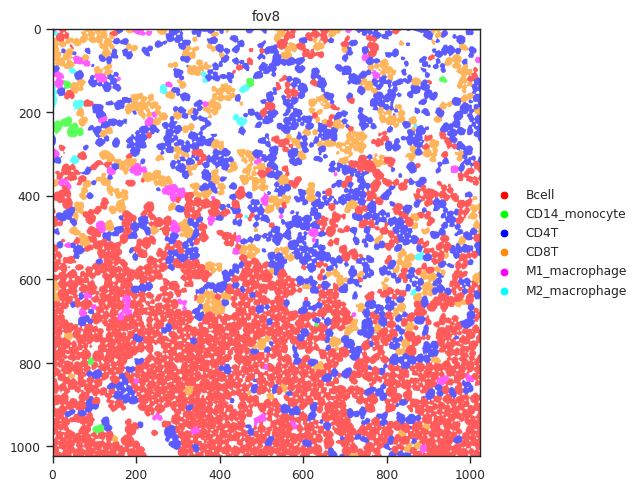

In [24]:
sdata.pl.render_labels('label_whole_' + cs, color='cell_meta_cluster', groups=cell_type_selection, palette=palette).pl.show(save=f'{cs}_label_whole.png')

In [25]:
def plot_heatmap(y, y_pred, **kwargs):
    from sklearn.metrics import confusion_matrix
    y_pred = pd.Series(y_pred).astype('category')
    n = len(y.categories)
    cm = confusion_matrix(y.astype(str), y_pred.astype(str))[n:, :n]
    df = pd.DataFrame(cm, index=y.categories, columns=y_pred.cat.categories)
    return sns.heatmap(df, **kwargs)

Skipping fov5 because too few cells
Skipping fov1 because too few cells
Skipping fov4 because too few cells
Skipping fov6 because too few cells
Skipping fov9 because too few cells
Skipping fov7 because too few cells
Skipping fov2 because too few cells
SpatialData object
├── Images
│     └── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov8': DataArray[yx] (1024, 1024)
│     └── 'label_whole_fov8': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3346, 22)
with coordinate systems:
    ▸ 'fov8', with elements:
        raw_image_fov8 (Images), label_nuclear_fov8 (Labels), label_whole_fov8 (Labels)
AnnData object with n_obs × n_vars = 3346 × 22
    obs: 'index', 'cell_size', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'centroid-0', 'centroid-1', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'cen

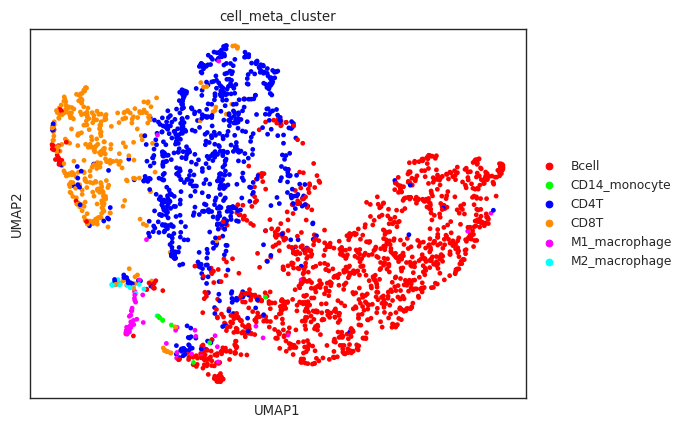

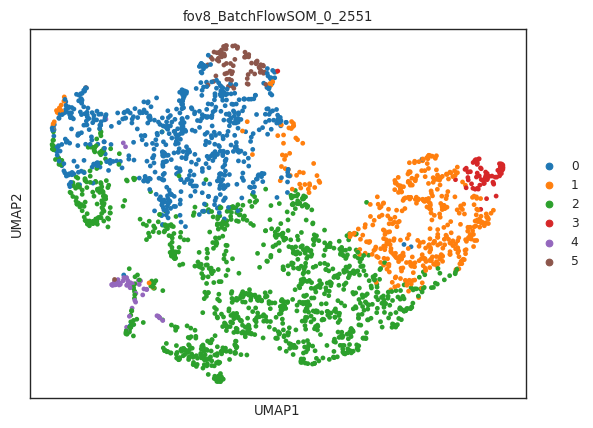

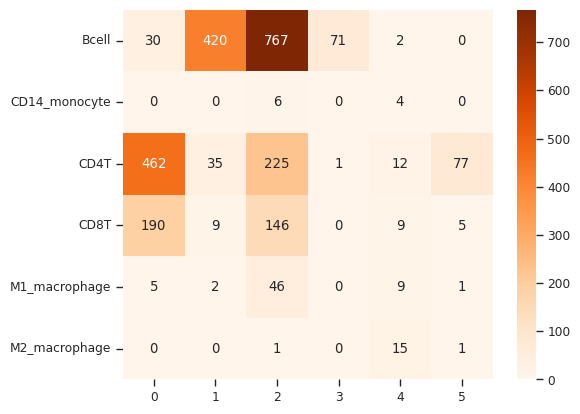

/srv/scratch/benjaminr/harpy_figures/.pixi/envs/harpy/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


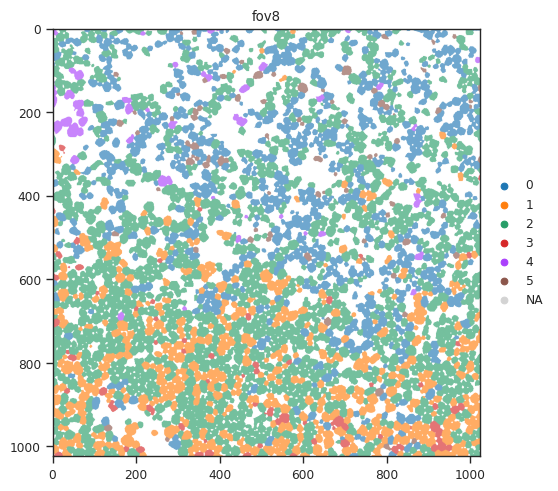

SpatialData object
├── Images
│     └── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov8': DataArray[yx] (1024, 1024)
│     └── 'label_whole_fov8': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3346, 22)
with coordinate systems:
    ▸ 'fov8', with elements:
        raw_image_fov8 (Images), label_nuclear_fov8 (Labels), label_whole_fov8 (Labels)
AnnData object with n_obs × n_vars = 3346 × 22
    obs: 'index', 'cell_size', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'centroid-0', 'centroid-1', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster', 'fov8_BatchFlowSOM_0_2551'
    uns: 'spatialdata_attrs', 'fov8_BatchFlowSOM_0_2551_colors'


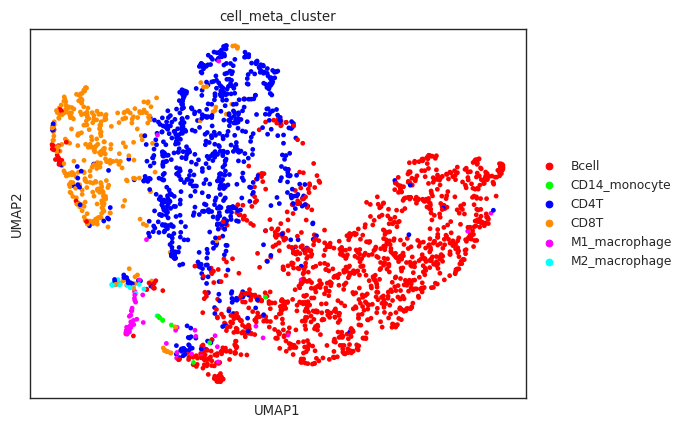

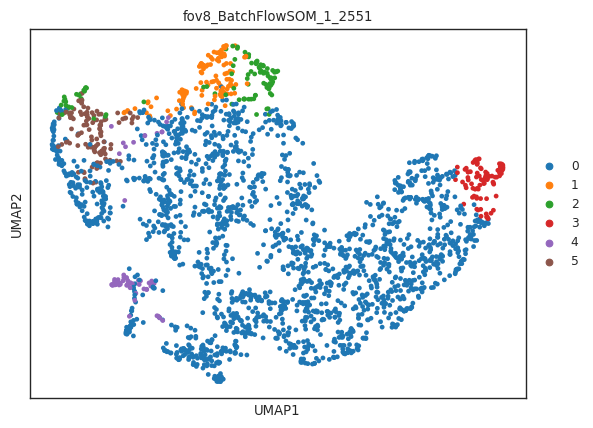

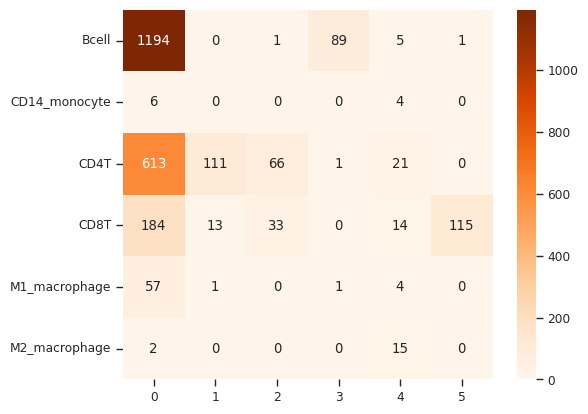

/srv/scratch/benjaminr/harpy_figures/.pixi/envs/harpy/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


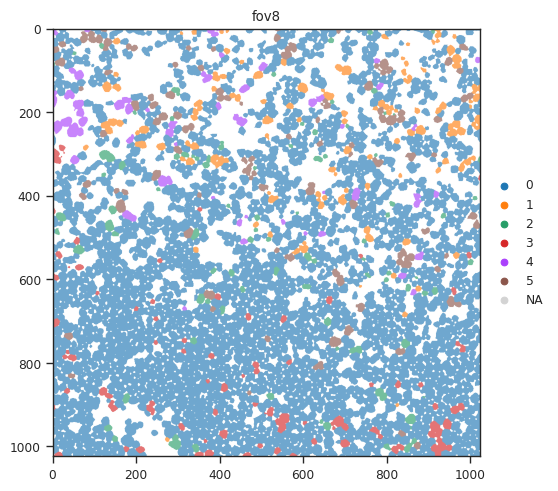

SpatialData object
├── Images
│     └── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov8': DataArray[yx] (1024, 1024)
│     └── 'label_whole_fov8': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3346, 22)
with coordinate systems:
    ▸ 'fov8', with elements:
        raw_image_fov8 (Images), label_nuclear_fov8 (Labels), label_whole_fov8 (Labels)
AnnData object with n_obs × n_vars = 3346 × 22
    obs: 'index', 'cell_size', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'centroid-0', 'centroid-1', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster', 'fov8_BatchFlowSOM_0_2551', 'fov8_BatchFlowSOM_1_2551'
    uns: 'spatialdata_attrs', 'fov8_BatchFlowSOM_0_2551_colors', 'fov8_BatchFlowSOM_1_2551_colors'


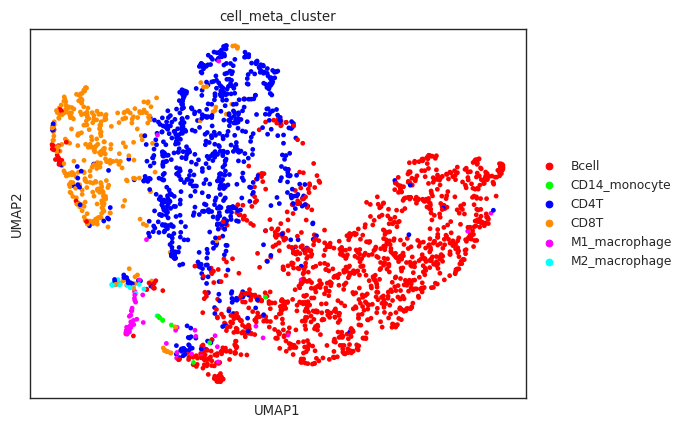

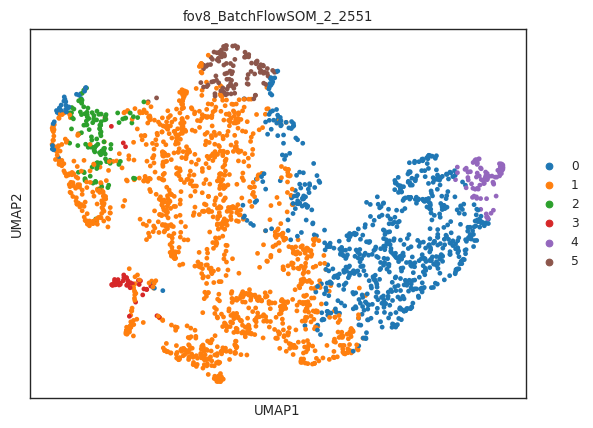

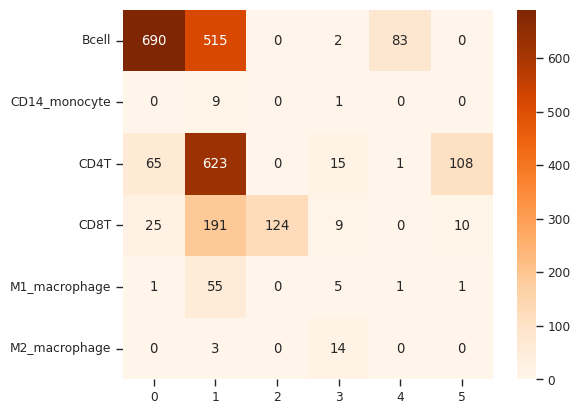

/srv/scratch/benjaminr/harpy_figures/.pixi/envs/harpy/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


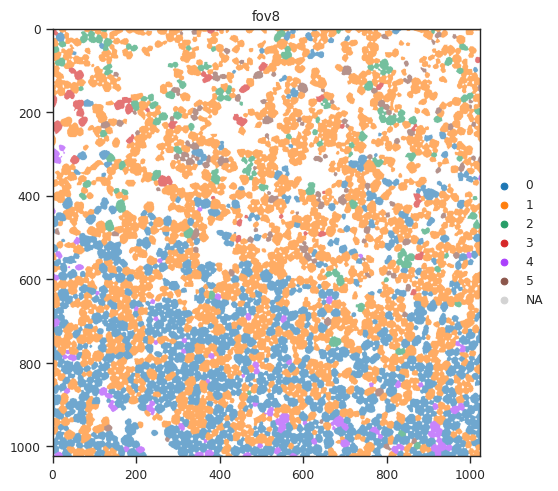

,sample,model,v_measure,homogeneity,random_state,n_cells
25,fov0,BatchFlowSOM,0.290829,0.258810,0,585
29,fov0,BatchFlowSOM,0.254793,0.256655,1,585
33,fov0,BatchFlowSOM,0.225553,0.187876,2,585
24,fov0,FlowSOM,0.259804,0.270044,0,585
28,fov0,FlowSOM,0.289740,0.299597,1,585
32,fov0,FlowSOM,0.216579,0.204784,2,585
27,fov0,KMeans,0.327324,0.326752,0,585
31,fov0,KMeans,0.326810,0.362300,1,585
35,fov0,KMeans,0.296090,0.332290,2,585
26,fov0,PyFlowSOM,0.250914,0.242474,0,585


In [ ]:
# do simple clustering and evaluate with V-measure
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score, homogeneity_score
from flowsom.models import FlowSOMEstimator, PyFlowSOMEstimator, BatchFlowSOMEstimator 

results = []

# for all coordinate systems, filter and check length of table
for cs in sdata_all.coordinate_systems:
    sdata = sd.SpatialData.filter_by_coordinate_system(sdata_all, cs)
    adata = sdata['table']
    mask = adata.obs['cell_meta_cluster'].isin(cell_type_selection)
    adata_subset = adata[mask, marker_list].copy()
    df = sc.get.obs_df(adata_subset, keys=[*marker_list, 'cell_meta_cluster'])
    # print(f"Coordinate system: {cs}")
    # print(f"Number of initial cells: {len(adata)}")
    # mask = df['cell_meta_cluster'].isin(cell_type_selection)
    # df_subset = df[mask].copy()
    # print(f"Number of final cells: {len(df_subset)}")
    if len(df) < 500:
        print(f"Skipping {cs} because too few cells")
        continue

    # sdata.pl.render_labels('label_whole_' + cs, color='cell_meta_cluster', groups=cell_type_selection, palette=palette).pl.show(save=f'{cs}_label_whole.png')
    sc.pp.neighbors(adata_subset, n_neighbors=10)
    sc.tl.umap(adata_subset, min_dist=0.1, spread=1.0)
    # sc.pl.umap(adata_subset, color=['cell_meta_cluster'], return_fig=True).savefig(f'{cs}_cell_meta_cluster.png')

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

    n_clusters = 6

    for i in range(3):
        models = [
            ('FlowSOM', FlowSOMEstimator(n_clusters=n_clusters, n_jobs=1, seed=i)),
            ('BatchFlowSOM', BatchFlowSOMEstimator(n_clusters=n_clusters, n_jobs=3, seed=i, n_batches=2)),
            ('PyFlowSOM', PyFlowSOMEstimator(n_clusters=n_clusters, n_jobs=1, seed=i)),
            ('KMeans', KMeans(n_clusters=n_clusters, random_state=i)),
        ]

        for m in models:
            X = df[marker_list]
            y = df['cell_meta_cluster'].values.copy()
            # print(f"Model: {m[0]}")
            model = m[1]
            X = X.values
            # X = scaler.fit_transform(X)
            model.fit(X)
            y_pred = model.predict(X)
            # print(f"V-measure: {v_measure_score(y, y_pred)}")
            # print(f'Homogeneity: {homogeneity_score(y, y_pred)}')
            results.append({
                "sample": cs,
                "model": m[0],
                "v_measure": v_measure_score(y, y_pred),
                "homogeneity": homogeneity_score(y, y_pred),
                "random_state": i,
                "n_cells": len(df),
            })
            # from matplotlib.pyplot import subplots
            # fig, ax = subplots(figsize=(20, 20))
            # ConfusionMatrixDisplay.from_predictions(y.astype(str), y_pred.astype(str), ax=ax)
            if m[0] == 'BatchFlowSOM' and cs == 'fov8':
                title = f"{cs}_{m[0]}_{i}_{len(df)}"
                adata_subset.obs[title] = y_pred
                adata_subset.obs[title] = adata_subset.obs[title].astype('category')
                # make categorical
                sc.pp.neighbors(adata_subset, n_neighbors=10)
                sc.tl.umap(adata_subset, min_dist=0.1, spread=1.0)
                sc.pl.umap(adata_subset, color=['cell_meta_cluster'], return_fig=True, palette=palette).savefig(f'{title}_cell_meta_cluster.png')
                sc.pl.umap(adata_subset, color=[title], return_fig=True).savefig(f'{title}_prediction.png')
                # sc.pl.umap(adata_subset, color=marker_list, return_fig=True).savefig(f'{title}_markers.png')
                # sdata['table'] = adata_subset
                print(sdata)
                print(sdata['table'])

                # take y_pred and make it a column in the original table without the subset by using the mask
                # make an empty series None of size
                # y_pred_full = np.full(len(adata), -1)
                # sdata['table'].obs[title] = pd.Series(index=adata.obs.index)
                y_pred_full = np.full(len(mask), None)
                y_pred_full[mask] = y_pred
                sdata['table'].obs[title] = y_pred_full
                sdata['table'].obs[title] = sdata['table'].obs[title].astype('category')
                plt.show()
                plt.close()
                plot_heatmap(y, y_pred, annot=True, fmt='d', cmap='Oranges', square=True)
                plt.show()
                plt.close()
                sdata.pl.render_labels('label_whole_' + cs, color=title).pl.show()
                plt.show()
                plt.close()
                # fig, ax = subplots(figsize=(20, 20))
                # ConfusionMatrixDisplay.from_predictions(y.astype(str), y_pred.astype(str), ax=ax)
import gc
gc.collect(2)
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by=['sample', 'model'])
df_results

In [36]:
ncells_to_cs = df_results.groupby(['n_cells']).first()
ncells_to_cs

,sample,model,v_measure,homogeneity,random_state
n_cells,,,,,
585,fov0,BatchFlowSOM,0.290829,0.258810,0
680,fov3,BatchFlowSOM,0.178812,0.148075,0
2425,fov10,BatchFlowSOM,0.285225,0.332881,0
2551,fov8,BatchFlowSOM,0.267750,0.288941,0


In [37]:
xticks = [f"{row.sample}\n(n={row.n_cells})" for row in ncells_to_cs['sample'].sort_index().reset_index().itertuples()]
xticks

['fov0\n(n=585)', 'fov3\n(n=680)', 'fov10\n(n=2425)', 'fov8\n(n=2551)']

/tmp/ipykernel_1131554/1330349461.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(xticks)


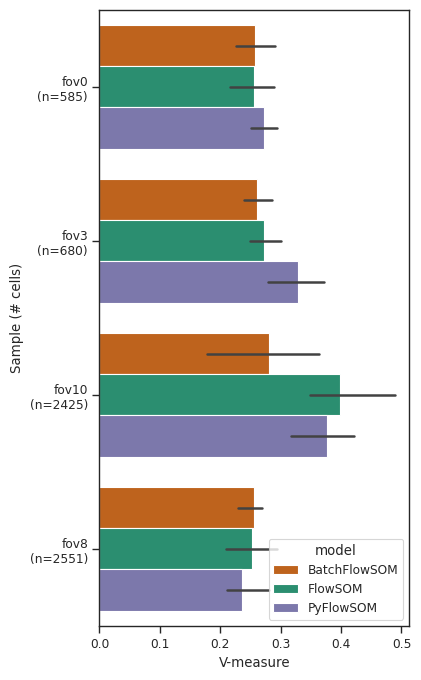

In [38]:
import seaborn as sns

# plt.figure(figsize=(4,8))
with plt.style.context({'figure.figsize': (4, 8)}):

    hue_order = ['flowsom_batch', 'flowsom', 'pyflowsom']
    # set colors to orange, blue, purple and green
    cmap = sns.color_palette("Dark2")
    # change order in cmap, switch first two colors
    cmap[0], cmap[1] = cmap[1], cmap[0]
    sns.set_palette(cmap)

    plot_df = df_results[df_results['model'] != 'KMeans'].copy()
    plot_df['n_cells'] = plot_df['n_cells'].astype(str)

    g = sns.barplot(
        data=plot_df,
        y='n_cells',
        x='v_measure',
        hue='model',
        # kind='bar',
        # height=5,
        # aspect=2,
        # hue_order=hue_order,
        # orient='y',
    )
    g.set_ylabel('Sample (# cells)')
    g.set_xlabel('V-measure')
    g.set_yticklabels(xticks)